<a href="https://colab.research.google.com/github/alcarnielo/Bootcamp_Alura/blob/main/Modulo_02/Alvaro_Carnielo_e_Silva_Projeto_Modulo_02_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 2 - Bootcamp Alura

Autor: Álvaro Carnielo e Silva

contato: alcarnielo@gmail.com

GitHub: https://github.com/alcarnielo/



# Objetivo

O objetivo deste trabalho é entender o que causou a redução da cobertura vacinal no Brasil nos últimos anos.

# Resumo

O Brasil vem apresentando redução na tacha de cobertura vacinal por um longo período, ao ponto que nos últimos 5 anos não consegue atingir as metas estabelecidas pelo SUS em várias vacinas. Além disso, no último ano (2019) nenhuma das vacinas do calendário oficial conseguiu atingir esta meta. 

Por isso, neste estudo é feita  uma avaliação da cobertura vacinal do Brasil, em busca de entender os motivos do não atingimento. 

Um dos pontos abordados é se houve aumento das doses aplicadas na população. Em seguida é avaliado se houve aumento da população que receberia vacinas. Por fim, testa-se a hipótese de correlação entre a redução de gastos com publicidade em saúde com a menor aderência da população às campanhas de vacinação.

# Bibliografia

[Agência Brasil](https://agenciabrasil.ebc.com.br/saude/noticia/2020-10/em-queda-ha-5-anos-coberturas-vacinais-preocupam-ministerio-da-saude#:~:text=As%20%C3%BAltimas%20metas%20de%20imuniza%C3%A7%C3%A3o,terem%20continuado%20acima%20dos%2080%25.)

[Jornal da USP](https://jornal.usp.br/atualidades/brasil-perde-certificado-de-pais-livre-do-sarampo/)

[DATASUS - TABNET](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/)

[Portal da Transparência - Saúde](http://www.portaltransparencia.gov.br/funcoes/10-saude?ano=2020)

[Portal da Transparência - Despesas](http://transparencia.gov.br/despesas/programa-e-acao?paginacaoSimples=true&tamanhoPagina=&offset=&direcaoOrdenacao=asc&de=01%2F01%2F2014&ate=31%2F12%2F2014&acao=4641&colunasSelecionadas=linkDetalhamento%2CmesAno%2Cprograma%2Cacao%2CvalorDespesaEmpenhada%2CvalorDespesaLiquidada%2CvalorDespesaPaga%2CvalorRestoPago)

[Histórico IPCA - IBGE](https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=series-historicas)

[Recursos Federais para o SUS por Município](http://www2.datasus.gov.br/DATASUS/index.php?area=0501&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?recsus/cnv/rs)

# Introdução

O Brasil vem sofrendo queda da cobertura vacinal há pelo menos 5 anos e, desde 2018, de acordo com [Agência Brasil](https://agenciabrasil.ebc.com.br/saude/noticia/2020-10/em-queda-ha-5-anos-coberturas-vacinais-preocupam-ministerio-da-saude#:~:text=As%20%C3%BAltimas%20metas%20de%20imuniza%C3%A7%C3%A3o,terem%20continuado%20acima%20dos%2080%25.) não atinge a meta de vacinação infantil.

Esta baixa adesão no calendário vem preocupando o Ministério da Saúde, pois a baixa adesão das campanhas de vacinação pode fazer com que doenças outrora extintas retornem ao país, como é o caso do sarampo, que retornou em 2016 fazendo com que o Brasil perdesse o [selo de área livre de sarampo](https://jornal.usp.br/atualidades/brasil-perde-certificado-de-pais-livre-do-sarampo/) em 2019.

Para entender esse comportamento de queda de cobertura vacinal, foi feita uma avaliação dos dados de imunologia do Ministério da Saúde para todo o país e da evolução populacional ao longo do tempo.

# Análise de dados

Nessa análise de dados foram selecionadas algumas fontes que pudessem contribuir com o entendimento do problema e aumentar o entendimento da redução de cobertura vacinal no país.

## Import de bibliotecas do python

In [2]:
#### Importar libs
# libs numericas e dados
import numpy as np
import pandas as pd
import datetime
from io import StringIO

# libs gráficas
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.widgets as widgets
import seaborn as sns
import missingno as msno

## Dados de Imunização Geral

Para iniciar a análise é necessário carregar os dados de cobertura vacinal retirados do [painel de imunização do TABNET](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def) presente no [portal DATASUS](https://datasus.saude.gov.br/informacoes-de-saude-tabnet/).

O objetivo de utilizar estes dados é, a partir dele, ter uma visão geral da cobertura vacinal no Brasil.

In [3]:
#### Carregar dados de cobertura vacinal
link_cob_vacinal = 'https://raw.githubusercontent.com/alcarnielo/Bootcamp_Alura/main/Modulo_02/cobertura_vacianl.csv'
cobertura_vacinal = pd.read_csv(link_cob_vacinal, sep=';', encoding='ISO-8859-1',
                                skiprows=3, skipfooter=19, decimal=',')
cobertura_vacinal.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,11 Rondônia,42.76,50.80,76.05,83.33,93.26,82.31,79.59,83.70,78.18,72.30,81.87,80.75,84.44,86.21,82.39,83.87,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45,51.44,79.88
1,12 Acre,20.53,46.61,36.59,67.56,66.38,85.61,66.79,76.77,81.66,77.54,80.21,72.09,70.66,80.54,75.04,79.18,76.32,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44,45.44,69.26
2,13 Amazonas,20.15,35.82,49.88,72.01,70.62,72.19,70.91,70.68,70.98,64.77,72.14,73.67,74.81,78.84,76.40,78.63,73.30,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82,49.97,69.65
3,14 Roraima,64.06,88.84,89.18,80.26,97.45,93.76,83.94,72.67,78.33,72.99,80.28,78.26,74.22,76.90,71.13,80.21,75.19,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76,48.04,75.68
4,15 Pará,32.44,40.11,51.26,67.09,67.46,82.95,77.23,83.43,82.66,80.50,97.38,89.17,86.99,87.87,84.70,84.02,81.55,84.11,77.87,67.91,71.71,67.51,41.43,57.60,57.44,37.53,73.89


Uma vez que os dados de cobertura vacinal foram carregados, é necessário fazer uma inspeção dos dados em busca de dados faltantes e outros problemas que podem ser encontrados.

In [4]:
#### Analizar dataframe
# Fazer cópia
cob_vacinal = cobertura_vacinal.copy()
# avaliar itens dentro do DataFrame
cob_vacinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unidade da Federação  28 non-null     object 
 1   1994                  28 non-null     object 
 2   1995                  28 non-null     object 
 3   1996                  28 non-null     object 
 4   1997                  28 non-null     float64
 5   1998                  28 non-null     float64
 6   1999                  28 non-null     float64
 7   2000                  28 non-null     float64
 8   2001                  28 non-null     float64
 9   2002                  28 non-null     float64
 10  2003                  28 non-null     float64
 11  2004                  28 non-null     float64
 12  2005                  28 non-null     float64
 13  2006                  28 non-null     float64
 14  2007                  28 non-null     float64
 15  2008                  28 

Nas colunas de 1994 até 1996 os dados estão caracterizados como **object**. Esse tipo de dado pode provocar dificuldades de análise. Isso, em geral, é causado por dados faltantes. Para isso, faz-se necessário uma observação mais detalhada deles.

In [5]:
# Visualizar apenas colunas de 1994 a 1996
cols = ['1994','1995','1996']
cob_vacinal[cols]

,1994,1995,1996
0,42.76,50.80,76.05
1,20.53,46.61,36.59
2,20.15,35.82,49.88
3,64.06,88.84,89.18
4,32.44,40.11,51.26
5,...,34.68,44.75
6,...,...,65.44
7,27.43,35.69,41.05
8,62.22,48.16,46.40
9,49.20,50.06,60.28


Conforme se imaginava, as colunas de 1994 a 1996 apresentam dados faltantes. Contudo, esses dados não foram reconhecidos como dados **NaN** no carregamento dos dados. Para que isso ocorra, é necessário carregar novamente os dados com o parâmetro **na_values = "..."**.

Além disso, os nomes das colunas foram carregados como **str**. Para facilitar avaliações e gráficos futuros, esses dados serão convertidos para **int**

In [6]:
#### Recarregar os dados de cobertura vacinal para que o dataframe reconheça "..."
#### como NaN
link_cob_vacinal = 'https://raw.githubusercontent.com/alcarnielo/Bootcamp_Alura/main/Modulo_02/cobertura_vacianl.csv'
cobertura_vacinal = pd.read_csv(link_cob_vacinal, sep=';', encoding='ISO-8859-1',
                                skiprows=3, skipfooter=19, decimal=',', na_values='...', 
                                index_col=0)
cob_vacinal = cobertura_vacinal.copy()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [7]:
#### Converter os anos nas colunas em int
cob_vacinal.columns
cob_vacinal = cob_vacinal.loc[:,'1994':'2019']
cob_vacinal.columns =cob_vacinal.columns.astype('int')

#### Ajustar index
cob_vacinal.index = cob_vacinal.index.rename('uf')
cob_vacinal.index = cob_vacinal.index.str[3:]
cob_vacinal.index = cob_vacinal.index.tolist()[:-1]+['Total']
cob_vacinal.index.rename('uf')

Index(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins',
       'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba',
       'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais',
       'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná',
       'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul',
       'Mato Grosso', 'Goiás', 'Distrito Federal', 'Total'],
      dtype='object', name='uf')

In [8]:
# Checar tipo de dados em cob_vacinal
cob_vacinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Rondônia to Total
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1994    16 non-null     float64
 1   1995    25 non-null     float64
 2   1996    27 non-null     float64
 3   1997    28 non-null     float64
 4   1998    28 non-null     float64
 5   1999    28 non-null     float64
 6   2000    28 non-null     float64
 7   2001    28 non-null     float64
 8   2002    28 non-null     float64
 9   2003    28 non-null     float64
 10  2004    28 non-null     float64
 11  2005    28 non-null     float64
 12  2006    28 non-null     float64
 13  2007    28 non-null     float64
 14  2008    28 non-null     float64
 15  2009    28 non-null     float64
 16  2010    28 non-null     float64
 17  2011    28 non-null     float64
 18  2012    28 non-null     float64
 19  2013    28 non-null     float64
 20  2014    28 non-null     float64
 21  2015    28 non-null     float64
 22 

In [9]:
#### verificar existência de dados nulos ou faltantes no restante do dataframe
cob_vacinal.isna().sum()

1994    12
1995     3
1996     1
1997     0
1998     0
1999     0
2000     0
2001     0
2002     0
2003     0
2004     0
2005     0
2006     0
2007     0
2008     0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
dtype: int64

Text(0.5, 0, '\n Figura 01: Matriz de dados faltantes da cobertura vacinal para todos os estados')

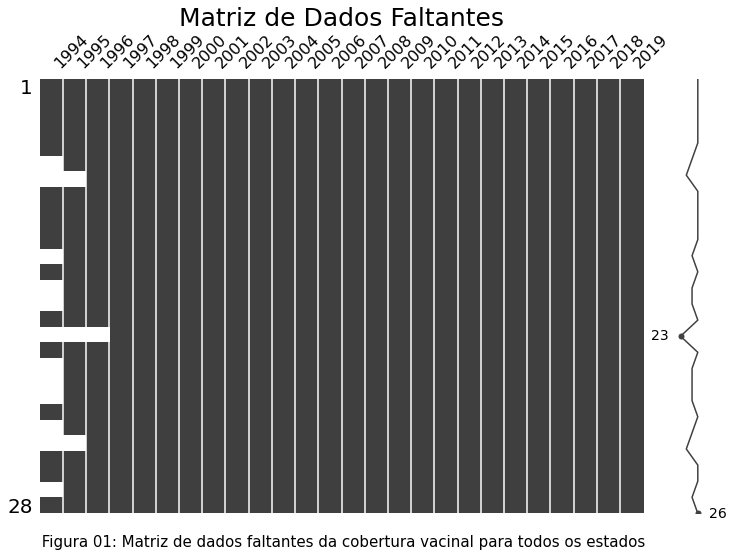

In [10]:
#### Gerar gráfico de números faltantes
msno.matrix(cob_vacinal, figsize=(12,8))
plt.title('Matriz de Dados Faltantes', fontsize=25)
plt.xlabel('\n Figura 01: Matriz de dados faltantes da cobertura vacinal para todos os estados'
, fontsize=15)

(0.0, 120.0)

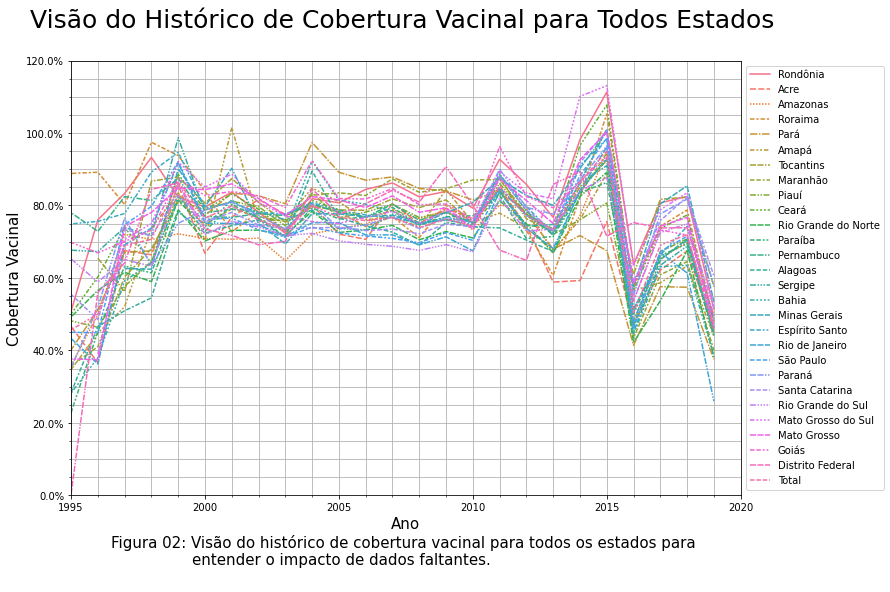

In [11]:
#### Gerar gráfico da Cobertura vacinal
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=cob_vacinal.T)
ax.set_title('Visão do Histórico de Cobertura Vacinal para Todos Estados \n',
             fontsize=25)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:}%'))
ax.set_xlabel('''Ano
Figura 02: Visão do histórico de cobertura vacinal para todos os estados para 
entender o impacto de dados faltantes.                           
''', fontsize=15)
ax.set_ylabel('Cobertura Vacinal', fontsize=15)
plt.legend(bbox_to_anchor=(1,1))
ax.set_xticks(np.arange(1995,2021,1), minor=True)
ax.set_yticks(np.arange(0,120,5), minor=True)
ax.grid(which='both')
ax.set_xlim(1995,2020)
ax.set_ylim(0,120)

Agora que todas as colunas numéricas estão corrigidas (**float**) e o nome dos index estão com o nome dos estados, é possível perceber que há muitos dados faltantes antes de 1998. Essa falta é uma das possíveis causa da baixa cobertura nos anos iniciais da série de dados. Contudo, não é possível afirmar isso de forma categórica, visto que podem ter outras variáveis que não estão presentes no estudo.

Assim, por se tratar de dados antigos, com mais de 20 anos, decidiu-se que os dados anteriores a 2000 não serão utilizados.

In [12]:
#### Selecionando apenas dados a partir de 2000
cob_vacinal = cob_vacinal.loc[:,2000:]

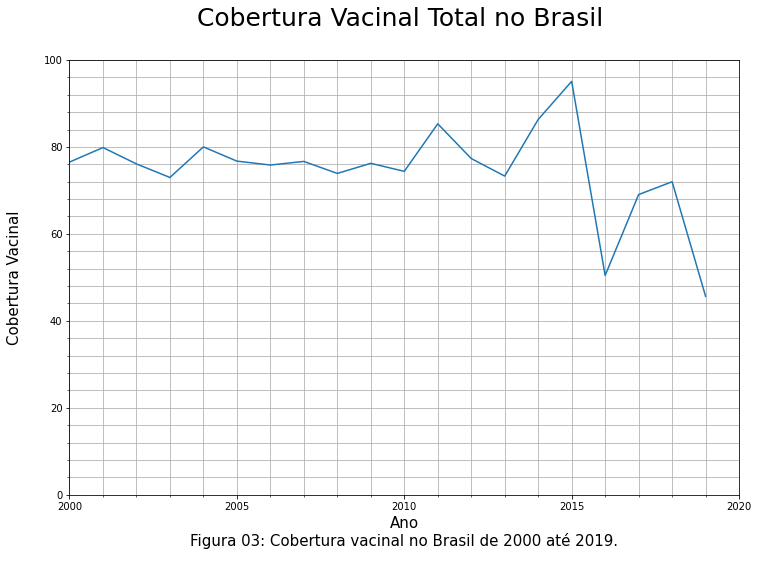

In [13]:
#### Gerar gráfico de cobertura vacinal
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=cob_vacinal.T, x=cob_vacinal.T.index, y='Total')
# Titulos
ax.set_title('Cobertura Vacinal Total no Brasil \n', fontsize=25)
ax.set_xlabel('''Ano
Figura 03: Cobertura vacinal no Brasil de 2000 até 2019.
''', fontsize=15)
ax.set_ylabel('''Cobertura Vacinal
''', fontsize=15)
ax.set_xticks(np.arange(2000,2020,1), minor=True)
ax.set_xticks(np.arange(2000,2021,5))
ax.set_yticks(np.arange(0,101,4), minor=True)
ax.set_xlim(2000,2020)
ax.grid(which='both')

É possível perceber que houve uma queda na cobertura vacinal de 2015 em diante, conforme citado na introdução.

Para entender essa queda, é necessário verificar as regiões e estados puxaram essa média para baixo.

In [14]:
# Montar dicionário de regiões
regiao_dict = {'1': 'Norte', '2': 'Nordeste', '3': 'Sudeste',
               '4': 'Sul', '5': 'Centro-Oeste'}
regioes = dict(zip(cobertura_vacinal.index.str[3:],
                   cobertura_vacinal.index.str[0].map(regiao_dict)))
cob_vacinal['regiao'] = regioes.values()

In [15]:
# Desdobrar dataframe para possibilitar gerar gráficos mais facilemnte
cob_vacinal_melt = cob_vacinal.iloc[:-1,1:-1
                                    ].reset_index().melt(
                                                         id_vars='index', 
                                                    value_vars=cob_vacinal.columns[1:-1],
                                                         var_name='ano', 
                                                         value_name='cobertura'
                                                         )
cob_vacinal_melt.head()

,index,ano,cobertura
0,Rondônia,2001,83.70
1,Acre,2001,76.77
2,Amazonas,2001,70.68
3,Roraima,2001,72.67
4,Pará,2001,83.43


In [16]:
# Incluir a coluna de região no DF
cob_vacinal_melt['regiao'] = cob_vacinal_melt['index'].map(lambda x: cob_vacinal.loc[x,'regiao'])
cob_vacinal_melt.head()

,index,ano,cobertura,regiao
0,Rondônia,2001,83.70,Norte
1,Acre,2001,76.77,Norte
2,Amazonas,2001,70.68,Norte
3,Roraima,2001,72.67,Norte
4,Pará,2001,83.43,Norte


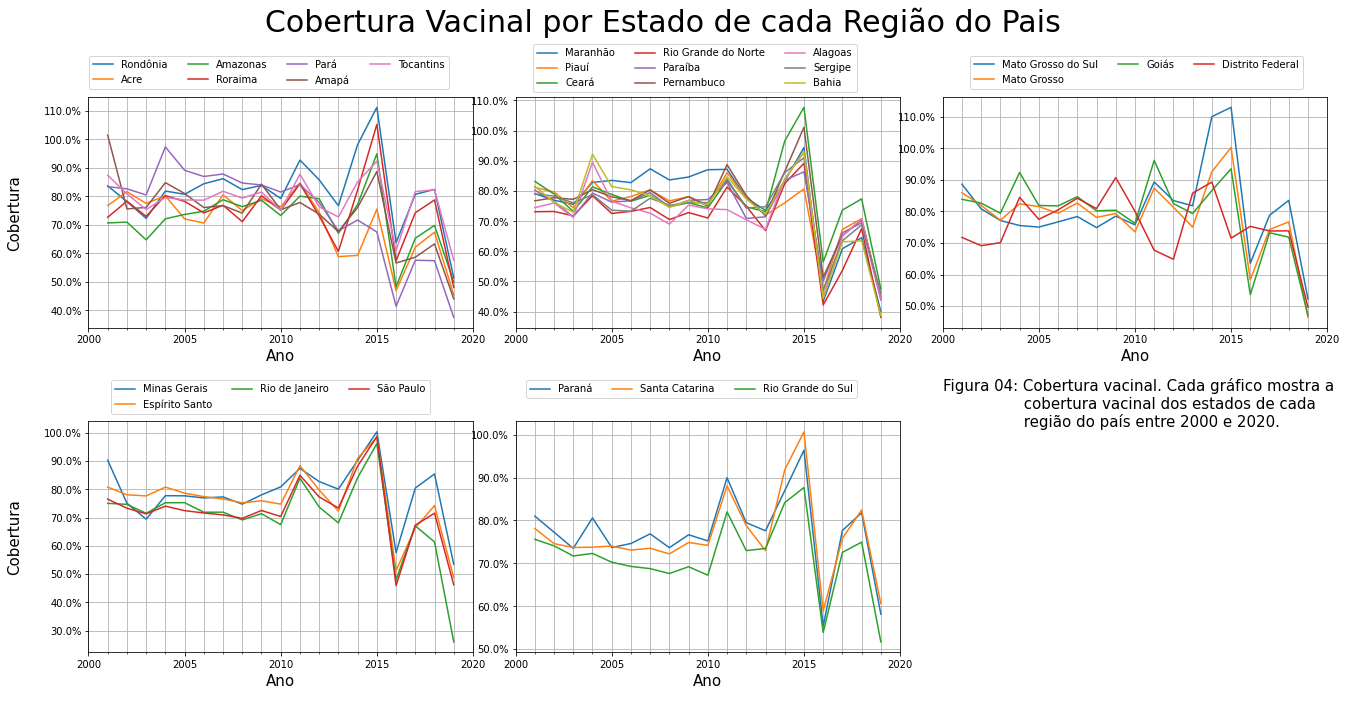

In [17]:
#### Plotar gráficos por região
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
ax1 = sns.lineplot(data=cob_vacinal_melt.query('regiao=="Norte"'), 
                   x='ano',
                   y='cobertura',
                   hue='index')
ax1.legend(ncol=4,
           bbox_to_anchor=(.95
           ,1.2))
ax1.set_xlabel('''Ano
''', fontsize=15)
ax1.set_ylabel('''Cobertura
''', fontsize=15)
ax1.set_xticks(np.arange(2000,2021,1), minor=True)
ax1.set_xticks(np.arange(2000,2021,5))
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:}%'))

ax1.grid(which='both')

plt.tight_layout(pad=6, h_pad=4, w_pad=3)


plt.subplot(2,3,2)
ax2 = sns.lineplot(data=cob_vacinal_melt.query('regiao=="Nordeste"'), 
                   x='ano',
                   y='cobertura',
                   hue='index')
ax2.legend(ncol=3,
           bbox_to_anchor=(.9,1.25))
ax2.set_xlabel('''Ano
''', fontsize=15)
ax2.set_ylabel('')
ax2.set_xticks(np.arange(2000,2021,1), minor=True)
ax2.set_xticks(np.arange(2000,2021,5))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:}%'))

ax2.grid(which='both')


plt.subplot(2,3,3)
ax3 = sns.lineplot(data=cob_vacinal_melt.query('regiao=="Centro-Oeste"'), 
                   x='ano',
                   y='cobertura',
                   hue='index')
ax3.legend(ncol=3,
           bbox_to_anchor=(0.95,1.2))
ax3.set_xlabel('''Ano
''', fontsize=15)
ax3.set_ylabel('')
ax3.set_xticks(np.arange(2000,2021,1), minor=True)
ax3.set_xticks(np.arange(2000,2021,5))
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:}%'))

ax3.grid(which='both')


plt.subplot(2,3,4)
ax4 = sns.lineplot(data=cob_vacinal_melt.query('regiao=="Sudeste"'), 
                   x='ano',
                   y='cobertura',
                   hue='index')
ax4.legend(ncol=3,
           bbox_to_anchor=(0.9,1.2))
ax4.set_xlabel('''Ano
''', fontsize=15)
ax4.set_ylabel('''Cobertura
''', fontsize=15)
ax4.set_xticks(np.arange(2000,2021,1), minor=True)
ax4.set_xticks(np.arange(2000,2021,5))
ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:}%'))

ax4.grid(which='both')


plt.subplot(2,3,5)
ax5 = sns.lineplot(data=cob_vacinal_melt.query('regiao=="Sul"'), 
             x='ano',
             y='cobertura',
             hue='index')
ax5.legend(ncol=3,
           bbox_to_anchor=(0.9,1.2))
ax5.set_xlabel('''Ano
''', fontsize=15)
ax5.set_ylabel('')
ax5.set_xticks(np.arange(2000,2021,1), minor=True)
ax5.set_xticks(np.arange(2000,2021,5))
ax5.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:}%'))


ax5.grid(which='both')

ax6 = plt.subplot(2,3,6)
ax6.text(0.,.9,'''
Figura 04: Cobertura vacinal. Cada gráfico mostra a 
                 cobertura vacinal dos estados de cada  
                 região do país entre 2000 e 2020.      
''', fontsize=15)
ax6.axis('off')
#plt.text(1,1,'Figura 04', fontsize=15)

plt.suptitle('''Cobertura Vacinal por Estado de cada Região do Pais \n\n
''', fontsize=30)


plt.show()

Da Figura 04, observa-se que houve queda de cobertura em todos os estados de todas as regiões após 2015.

É importante ressaltar que todos os estados apresentaram um aumento de cobertura em 2014 e 2015, seguido de uma queda nessa cobertura. É importante entender o que levou essa queda.

Como os dados são percentuais, e não absolutos, essa queda de cobertura pode ter ocorrido não pela menor distribuição de vacinas, mas sim pela mudança do critério. Para isso é necessário também avaliar a quantidade de vacinas distribuídas.

## Dados de Doses Aplicadas


Para avaliar as doses aplicadas nesse período é necessário antes de qualquer coisa fazer a mesma avaliação realizada para os dados de cobertura geral de imunização, isto é:
- manipulação inicial dos dados
- avaliar dados faltantes
- verificar existência de dados inconsistentes
- visão geral do comportamento dos dados

In [18]:
#### Carregar dados de doses aplicadas
link_doses_aplicadas = 'https://raw.githubusercontent.com/alcarnielo/Bootcamp_Alura/main/Modulo_02/doses_aplicadas_ano.csv'
doses_aplicadas = pd.read_csv(link_doses_aplicadas, encoding='ISO-8859-1', 
                              sep=';', thousands='.', decimal=',', index_col=0)

# Fazer cópia do df
doses_aplic = doses_aplicadas.copy()

# mudar indice
doses_aplic.index = doses_aplic.index.str[3:].tolist()[:-1]+['Total']
doses_aplic.index.rename('uf')

# mudar colunas
doses_aplic.columns = np.arange(1994,2021,1).tolist()+['Total']

QUantidade de dados NaN para cada ano de 1994 até 2020


1994     0
1995     0
1996     0
1997     0
1998     0
1999     0
2000     0
2001     0
2002     0
2003     0
2004     0
2005     0
2006     0
2007     0
2008     0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
Total    0
dtype: int64

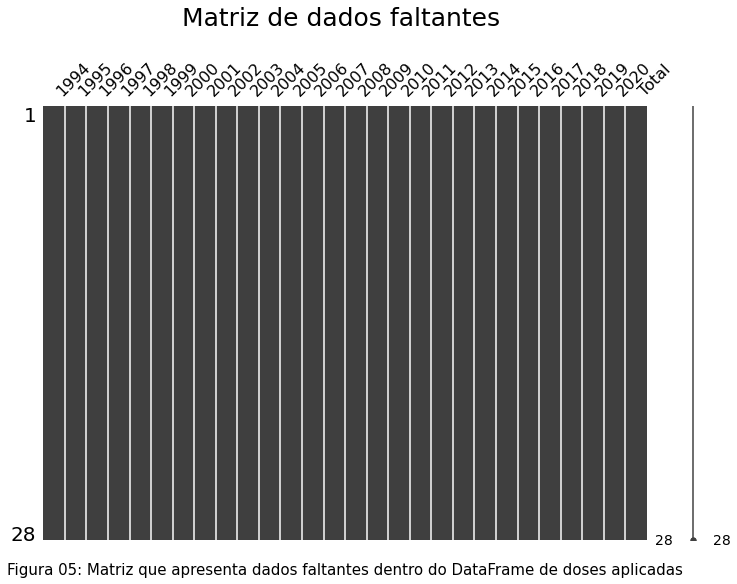

In [19]:
#### Avaliar dados faltantes
msno.matrix(doses_aplic,figsize=(12,8))
plt.title('Matriz de dados faltantes \n', fontsize=25)
plt.xlabel('\nFigura 05: Matriz que apresenta dados faltantes dentro do DataFrame de doses aplicadas'
, fontsize=15)
print('QUantidade de dados NaN para cada ano de 1994 até 2020')
doses_aplic.isna().sum()

Em uma avaliação geral, os dados de doses aplicadas encontram-se bem distribuídos, sem nenhum dado faltante.

Assim, faz-se necessário ter uma visão geral da distribuição de doses aplicadas.

In [20]:
# separar apenas dados de anos
doses_aplic_anos = doses_aplic.iloc[:-1,6:-1]

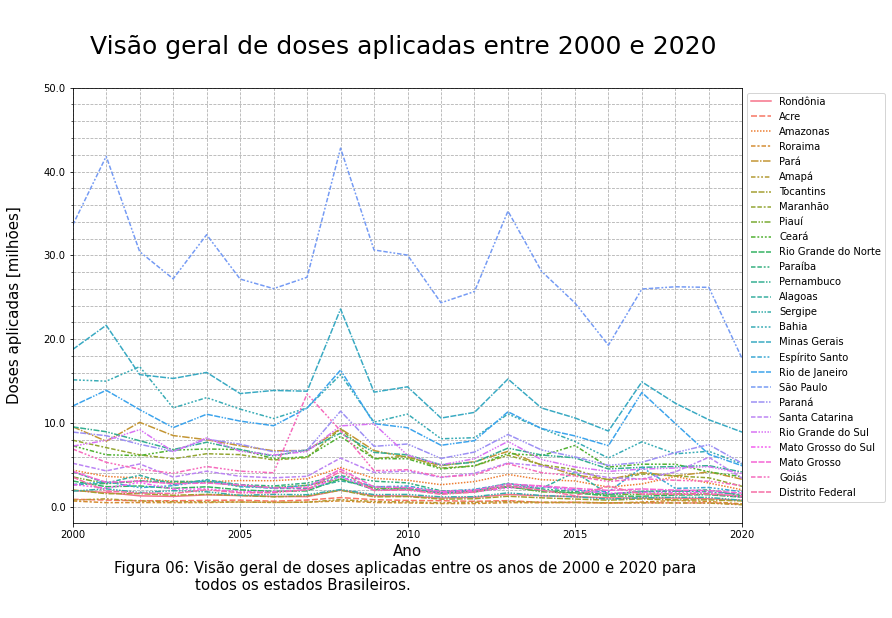

In [21]:
#### Visualição geral dos dados
fator=1e6
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=doses_aplic_anos.T/fator)
ax.legend(bbox_to_anchor=(1,1))
ax.set_title('\nVisão geral de doses aplicadas entre 2000 e 2020 \n',
         fontsize=25)
ax.set_xlabel('''Ano
Figura 06: Visão geral de doses aplicadas entre os anos de 2000 e 2020 para 
todos os estados Brasileiros.                                            
''', fontsize=15)
ax.set_ylabel('''Doses aplicadas [milhões]
''', fontsize=15)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:}'))
ax.set_xticks(np.arange(2000,2021,1), minor=True)
ax.set_xticks(np.arange(2000,2021,5))
ax.set_yticks(np.arange(0,51,2), minor=True)
ax.set_xlim(2000,2020)
ax.grid(which='both', linestyle='--')

Aparentemente há uma redução de doses aplicadas desde o início da série. É interessante entender se isso é geral ou se ocorreu apenas em alguma região específica.

Para isso, serão feitos 3 gráficos:
- Visão geral da proporção de doses relacionado às doses do ano 2000
- Distribuição de doses por estado para cada região
- Proporção de doses por estado de cada região comparado com o ano 2000

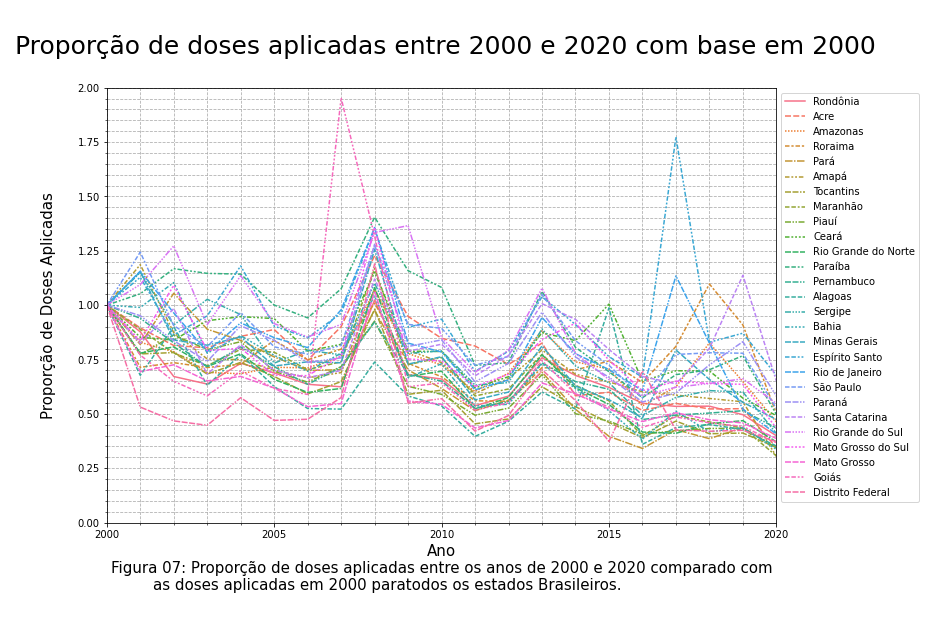

In [22]:
#### Gerar Gráfico da proporção de doses
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=doses_aplic_anos.T/doses_aplic_anos[2000])
# Ajustar legenda
ax.legend(bbox_to_anchor=(1,1))
# Ajustar título e eixos
ax.set_title('\n Proporção de doses aplicadas entre 2000 e 2020 com base em 2000\n',
         fontsize=25)
ax.set_xlabel('''Ano
Figura 07: Proporção de doses aplicadas entre os anos de 2000 e 2020 comparado com
as doses aplicadas em 2000 paratodos os estados Brasileiros.                       
''', fontsize=15)
ax.set_ylabel('''Proporção de Doses Aplicadas
''', fontsize=15)

# Ajustar ticks e grid
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
ax.set_xticks(np.arange(2000,2021,1), minor=True)
ax.set_xticks(np.arange(2000,2021,5))
ax.set_yticks(np.arange(0,2.01,.05), minor=True)
ax.set_yticks(np.arange(0,2.1,.25))
ax.set_xlim(2000,2020)
ax.set_ylim(0,2)
ax.grid(which='both', linestyle='--')

In [23]:
#### Fazer melt dos dados
# proporção de doses dos anos com relação a 2000
doses_aplic_anos_prop = (doses_aplic_anos.T/
                         doses_aplic_anos[2000])

# melt dos dados
doses_aplic_anos_prop_melt = doses_aplic_anos_prop.T.reset_index(
                             ).melt(id_vars='index',
                                    value_vars=doses_aplic_anos.columns,
                                    var_name = 'ano',
                                    value_name='doses'
                                    )
# Incluir coluna de região
doses_aplic_anos_prop_melt['regiao'] = doses_aplic_anos_prop_melt['index'
                                       ].map(lambda x: cob_vacinal.loc[x,'regiao']
                                             )

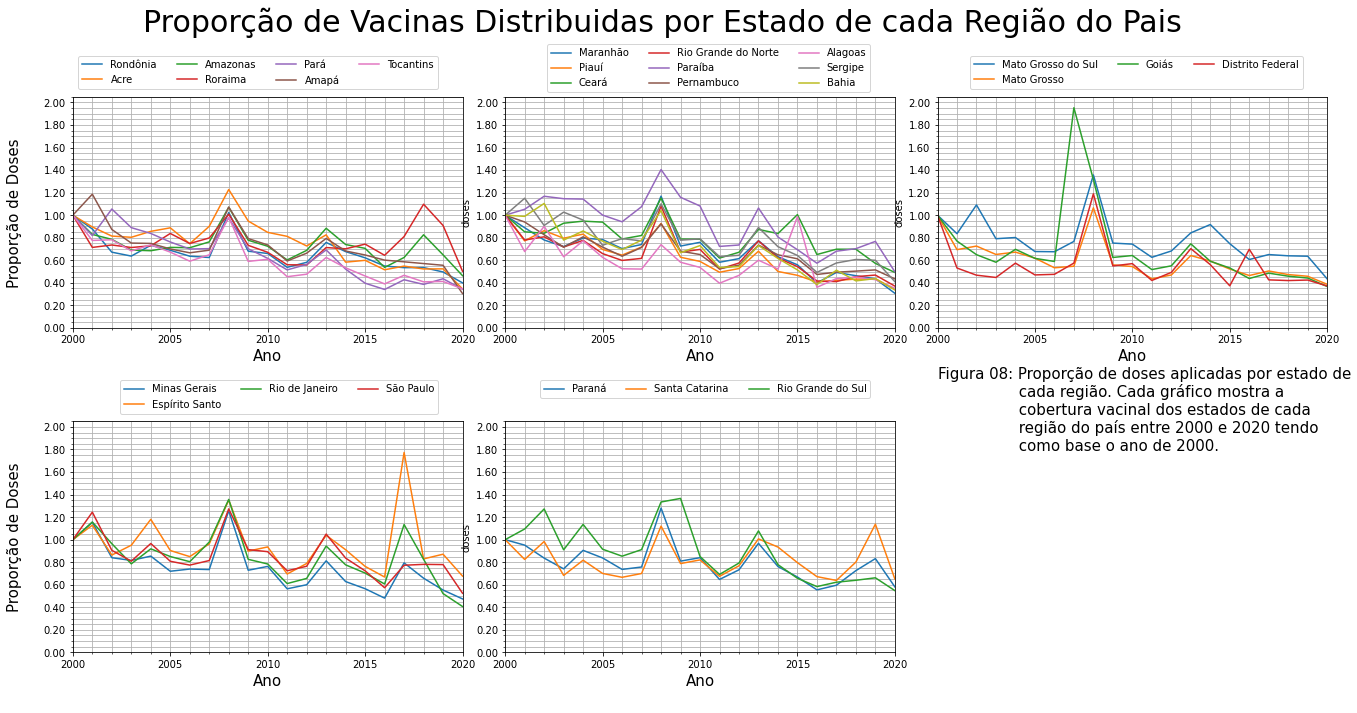

In [24]:
#### Plotar gráficos por região
plt.figure(figsize=(20,10))
# Subgrágico de região - Norte
plt.subplot(2,3,1)
ax1 = sns.lineplot(data=doses_aplic_anos_prop_melt.query('regiao=="Norte"'), 
                   x='ano',
                   y='doses',
                   hue='index')
ax1.legend(ncol=4,
           bbox_to_anchor=(.95
           ,1.2))
ax1.set_xlabel('''Ano
''', fontsize=15)
ax1.set_ylabel('''Proporção de Doses
''', fontsize=15)
ax1.set_xticks(np.arange(2000,2021,1), minor=True)
ax1.set_xticks(np.arange(2000,2021,5))
ax1.set_yticks(np.arange(0,2.1, .05), minor=True)
ax1.set_yticks(np.arange(0,2.1, .2))
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

ax1.set_xlim(2000,2020)

ax1.grid(which='both')

plt.tight_layout(pad=6, h_pad=4, w_pad=3)

# Subgrágico de região - Nordeste
plt.subplot(2,3,2)
ax2 = sns.lineplot(data=doses_aplic_anos_prop_melt.query('regiao=="Nordeste"'), 
                   x='ano',
                   y='doses',
                   hue='index')
ax2.legend(ncol=3,
           bbox_to_anchor=(.95,1.25))
ax2.set_xlabel('''Ano
''', fontsize=15)

ax2.set_xticks(np.arange(2000,2021,1), minor=True)
ax2.set_xticks(np.arange(2000,2021,5))
ax2.set_yticks(np.arange(0,2.1, .05), minor=True)
ax2.set_yticks(np.arange(0,2.1, .2))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

ax2.set_xlim(2000,2020)

ax2.grid(which='both')

# Subgrágico de região - Centro-Oeste
plt.subplot(2,3,3)
ax3 = sns.lineplot(data=doses_aplic_anos_prop_melt.query('regiao=="Centro-Oeste"'), 
                   x='ano',
                   y='doses',
                   hue='index')
ax3.legend(ncol=3,
           bbox_to_anchor=(.95,1.2))
ax3.set_xlabel('''Ano
''', fontsize=15)

ax3.set_xticks(np.arange(2000,2021,1), minor=True)
ax3.set_xticks(np.arange(2000,2021,5))
ax3.set_yticks(np.arange(0,2.1, .05), minor=True)
ax3.set_yticks(np.arange(0,2.1, .2))
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

ax3.set_xlim(2000,2020)

ax3.grid(which='both')

# Subgrágico de região - Sudeste
plt.subplot(2,3,4)
ax4 = sns.lineplot(data=doses_aplic_anos_prop_melt.query('regiao=="Sudeste"'), 
                   x='ano',
                   y='doses',
                   hue='index')
ax4.legend(ncol=3,
           bbox_to_anchor=(.95,1.2))
ax4.set_xlabel('''Ano
''', fontsize=15)
ax4.set_ylabel('''Proporção de Doses
''', fontsize=15)
ax4.set_xticks(np.arange(2000,2021,1), minor=True)
ax4.set_xticks(np.arange(2000,2021,5))
ax4.set_yticks(np.arange(0,2.1, .05), minor=True)
ax4.set_yticks(np.arange(0,2.1, .2))
ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

ax4.set_xlim(2000,2020)

ax4.grid(which='both')

# Subgrágico de região - Sul
plt.subplot(2,3,5)
ax5 = sns.lineplot(data=doses_aplic_anos_prop_melt.query('regiao=="Sul"'), 
                   x='ano',
                   y='doses',
                   hue='index')
ax5.legend(ncol=3,
           bbox_to_anchor=(.95,1.2))
ax5.set_xlabel('''Ano
''', fontsize=15)

ax5.set_xticks(np.arange(2000,2021,1), minor=True)
ax5.set_xticks(np.arange(2000,2021,5))
ax5.set_yticks(np.arange(0,2.1, .05), minor=True)
ax5.set_yticks(np.arange(0,2.1, .2))
ax5.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

ax5.set_xlim(2000,2020)

ax5.grid(which='both')

ax6 = plt.subplot(2,3,6)
ax6.text(0.,.8,'''
Figura 08: Proporção de doses aplicadas por estado de
                 cada região. Cada gráfico mostra a     
                 cobertura vacinal dos estados de cada  
                 região do país entre 2000 e 2020 tendo 
                 como base o ano de 2000.                 
''', fontsize=15)
ax6.axis('off')
#plt.text(1,1,'Figura 04', fontsize=15)

plt.suptitle('''Proporção de Vacinas Distribuidas por Estado de cada Região do Pais \n\n
''', fontsize=30)


plt.show()

Até aqui é possível perceber que além de não ter a meta de vacinação atingida, também houve uma redução das doses aplicadas na população em todos os estados de todas as regiões.

Essa redução de doses pode não ser um problema desde que ela tenha sido acompanhada de uma redução de pessoas que receberiam as doses.

## Dados de População por Faixa Etária

Uma vez que se observou uma redução de número de doses aplicadas acompanhada com uma redução de cobertura vacinal, faz-se necessário entender o que ocorreu no período com a população que recebe estas doses.

Uma vez que a maior parte das vacinas que são distribuídas à população são aplicadas na infância [entre 0 e 6 anos](http://www.campogrande.ms.gov.br/cartadeservicos/artigos/tabela-de-vacinacao/), é preciso entender como foi a evolução da população ao longo do período avaliado.

In [25]:
#### Carregar dados de projeção de população por faixa etária por ano
anos = np.arange(2000,2021,1)
proj_pop_melt = pd.DataFrame()

for ano in anos:
    link_proj_populacao = f'https://raw.githubusercontent.com/alcarnielo/Bootcamp_Alura/main/Modulo_02/proj_pop_residente_por_uf_{ano}.csv'
    proj_populacao = pd.read_csv(link_proj_populacao, sep=';', encoding='ISO-8859-1',
                                thousands='.', decimal=',',
                                skiprows=3, skipfooter=5)

    ## Manipulação dos dados
    cols = proj_populacao.columns.tolist()
    cols[0] = 'uf'
    
    proj_populacao.columns = cols
    proj_populacao.columns = proj_populacao.columns.str.replace('anos', ''
                                                            ).str.replace(' a ', '-')
    proj_populacao['uf'] = proj_populacao['uf'].str[3:]
    pro_populacao_anos = proj_populacao.iloc[:-1,:-1]
    proj_populacao_idade = pro_populacao_anos[pro_populacao_anos.columns[:-1]]

    proj_populacao_idade_melt = proj_populacao_idade.melt('uf')
    proj_populacao_idade_melt['ano'] = np.ones(proj_populacao_idade_melt.shape[0])*ano
    proj_pop_melt = proj_pop_melt.append(proj_populacao_idade_melt)

proj_pop_melt = proj_pop_melt.reset_index(drop=True)
proj_pop_melt.variable = proj_pop_melt.variable.str.strip()
proj_pop_melt.info()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10206 entries, 0 to 10205
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   uf        10206 non-null  object 
 1   variable  10206 non-null  object 
 2   value     10206 non-null  int64  
 3   ano       10206 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 319.1+ KB


In [26]:
#### Avaliar dados faltantes
print('Verificar existência de dados faltantes no dataFrame de projeção de população:')
proj_pop_melt.isna().sum()

Verificar existência de dados faltantes no dataFrame de projeção de população:


uf          0
variable    0
value       0
ano         0
dtype: int64

In [27]:
# Checar presença de dados espúrios
print('Principais dados em "uf":')
print(proj_pop_melt.uf.unique())
print('')
print('Principais dados em "variable":')
print(proj_pop_melt.variable.unique())
print('')
print('Principais dados em "value":')
print(proj_pop_melt.value.unique())
print('')
print('Principais dados em "ano":')
print(proj_pop_melt.ano.unique())

Principais dados em "uf":
['Rondônia' 'Acre' 'Amazonas' 'Roraima' 'Pará' 'Amapá' 'Tocantins'
 'Maranhão' 'Piauí' 'Ceará' 'Rio Grande do Norte' 'Paraíba' 'Pernambuco'
 'Alagoas' 'Sergipe' 'Bahia' 'Minas Gerais' 'Espírito Santo'
 'Rio de Janeiro' 'São Paulo' 'Paraná' 'Santa Catarina'
 'Rio Grande do Sul' 'Mato Grosso do Sul' 'Mato Grosso' 'Goiás'
 'Distrito Federal']

Principais dados em "variable":
['0-4' '5-9' '10-14' '15-19' '20-24' '25-29' '30-34' '35-39' '40-44'
 '45-49' '50-54' '55-59' '60-64' '65-69' '70-74' '75-79' '80-84' '85-89']

Principais dados em "value":
[160573  84773 407544 ...  11222  28559  14107]

Principais dados em "ano":
[2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020.]


In [28]:
# ajuste de escala
proj_pop_melt['value'] = proj_pop_melt['value']/1e6

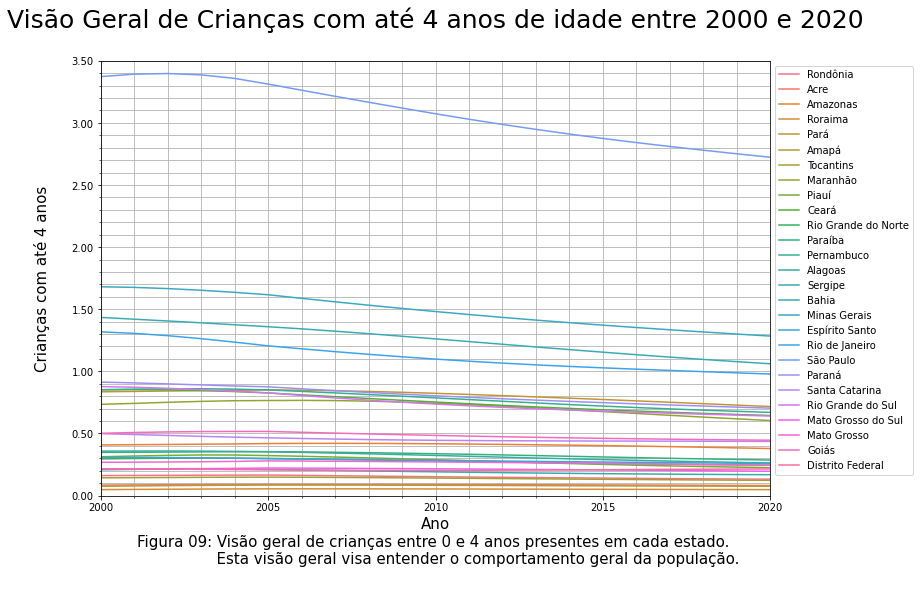

In [29]:
#### Exploração gráfica de evolução populacional para a faixa de 0 a 4 anos
plt.figure(figsize=(12,8))

ax = sns.lineplot(
                  data=proj_pop_melt.query('variable == "0-4"'), 
                  x='ano',
                  y='value',
                  hue='uf'
                  )
ax.set_title('Visão Geral de Crianças com até 4 anos de idade entre 2000 e 2020\n',
             fontsize=25)
ax.set_xlabel('''Ano
Figura 09: Visão geral de crianças entre 0 e 4 anos presentes em cada estado. 
                  Esta visão geral visa entender o comportamento geral da população.
''', fontsize=15)
ax.set_ylabel('''Crianças com até 4 anos
''', fontsize=15)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
ax.set_xticks(np.arange(2000,2021,1),minor=True)
ax.set_xticks(np.arange(2000,2021,5))
ax.set_yticks(np.arange(0,4,0.1),minor=True)
ax.set_yticks(np.arange(0,4,0.5))
ax.set_ylim(0,3.5)
ax.set_xlim(2000,2020)
ax.legend(bbox_to_anchor=(1,1))
ax.grid(which='both')

In [30]:
#### Avaliar crescimento proporcional da população de crianças até 4 anos
# Criar tabela pivotante apenas com dados de crianças de 0 a 4 anos
proj_pop_pivot_0a4 = proj_pop_melt.query('variable == "0-4"').pivot_table(values='value', index='ano', columns='uf')
proj_pop_pivot_0a4.tail()

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
ano,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016.0,0.085089,0.283664,0.077764,0.398509,1.134070,0.680505,0.209853,0.267843,0.457302,0.660953,0.255724,0.204543,1.352750,0.738585,0.305512,0.762492,0.708688,0.244664,0.256027,0.671105,1.017525,0.138798,0.050165,0.438584,0.174361,2.841127,0.129286
2017.0,0.084259,0.277968,0.077056,0.394089,1.114626,0.670786,0.211170,0.265458,0.454001,0.646128,0.252844,0.202359,1.334539,0.729485,0.300286,0.751214,0.697854,0.238949,0.252960,0.663013,1.007396,0.136935,0.049630,0.438051,0.172499,2.809738,0.127485
2018.0,0.083368,0.272540,0.076379,0.389272,1.095952,0.661640,0.212361,0.263084,0.451005,0.631676,0.249971,0.200173,1.317056,0.720682,0.295318,0.739766,0.687786,0.233828,0.250143,0.655263,0.997589,0.135197,0.049079,0.437451,0.170864,2.779776,0.125747
2019.0,0.082425,0.267357,0.075718,0.384132,1.078043,0.653031,0.213411,0.260718,0.448263,0.617737,0.247140,0.198012,1.300177,0.712149,0.290641,0.728275,0.678410,0.229224,0.247554,0.647708,0.987944,0.133580,0.048514,0.436755,0.169413,2.750916,0.124085
2020.0,0.081446,0.262386,0.075070,0.378749,1.060893,0.644888,0.214323,0.258364,0.445741,0.604347,0.244387,0.195897,1.283828,0.703891,0.286265,0.716840,0.669624,0.225016,0.245167,0.640270,0.978373,0.132095,0.047945,0.435965,0.168102,2.722887,0.122499


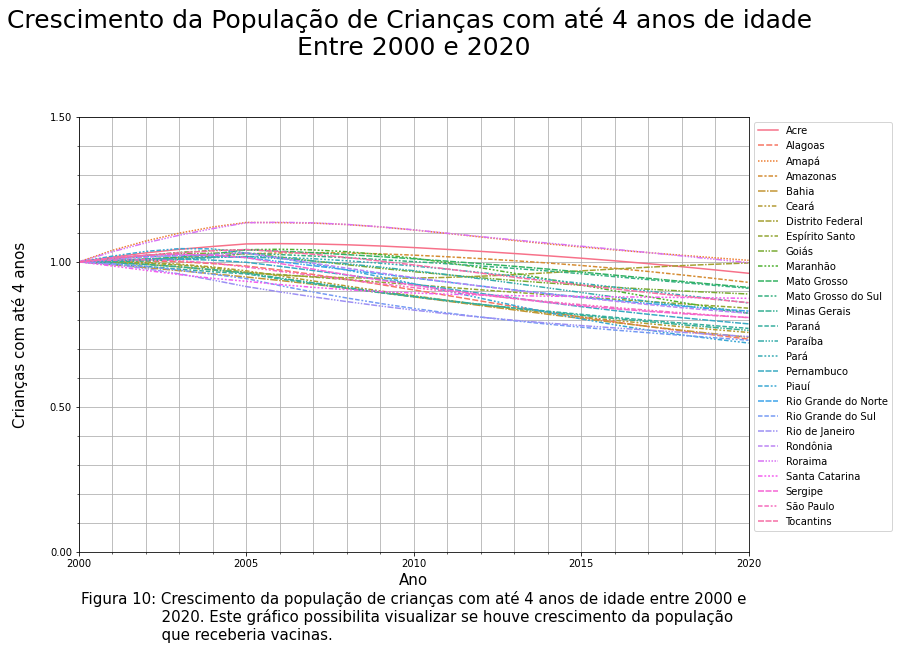

In [31]:
#### Gerar gráfico de crescimento populaciona de crianças até 4 anos 
#### proporcional com relação ao ano de 2000
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=proj_pop_pivot_0a4/proj_pop_pivot_0a4.T[2000])

ax.set_title('''Crescimento da População de Crianças com até 4 anos de idade 
Entre 2000 e 2020\n
''', fontsize=25)
ax.set_xlabel('''Ano
Figura 10: Crescimento da população de crianças com até 4 anos de idade entre 2000 e
                  2020. Este gráfico possibilita visualizar se houve crescimento da população    
                  que receberia vacinas.                                                                                        
''', fontsize=15)
ax.set_ylabel('''Crianças com até 4 anos
''', fontsize=15)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
ax.set_xticks(np.arange(2000,2021,1),minor=True)
ax.set_xticks(np.arange(2000,2021,5))
ax.set_yticks(np.arange(0,4,0.1),minor=True)
ax.set_yticks(np.arange(0,4,0.5))
ax.set_ylim(0,1.5)
ax.set_xlim(2000,2020)
ax.legend(bbox_to_anchor=(1,1))
ax.grid(which='both')

In [32]:
# incluir a coluna de região
proj_pop_melt['regiao'] = proj_pop_melt['uf'].map(lambda x: cob_vacinal.loc[x,'regiao'])
# filtrar apenas pessoas de 0 a 4 anos
proj_pop_melt_0a4 = proj_pop_melt.query('variable == "0-4"')

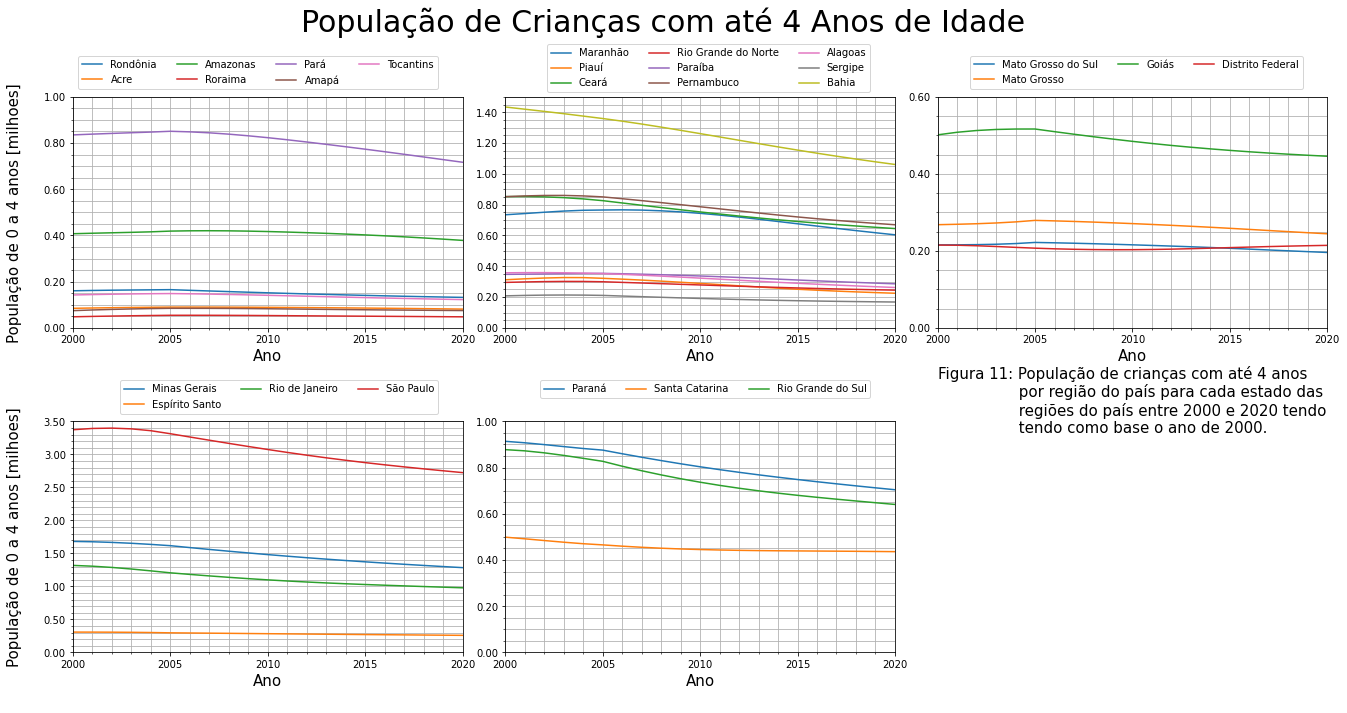

In [33]:
#### Gráfico de crescimento populacional absoluto por região

plt.figure(figsize=(20,10))
# Subgrágico de região - Norte
plt.subplot(2,3,1)
ax1 = sns.lineplot(data=proj_pop_melt_0a4.query('regiao=="Norte"'), 
                   x='ano',
                   y='value',
                   hue='uf')
ax1.legend(ncol=4,
           bbox_to_anchor=(.95
           ,1.2))
ax1.set_xlabel('''Ano
''', fontsize=15)
ax1.set_ylabel('''População de 0 a 4 anos [milhoes]
''', fontsize=15)
ax1.set_xticks(np.arange(2000,2021,1), minor=True)
ax1.set_xticks(np.arange(2000,2021,5))
ax1.set_yticks(np.arange(0,2.1, .05), minor=True)
ax1.set_yticks(np.arange(0,2.1, .2))
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

ax1.set_xlim(2000,2020)
ax1.set_ylim(0,1)

ax1.grid(which='both')

plt.tight_layout(pad=6, h_pad=4, w_pad=3)

# Subgrágico de região - Nordeste
plt.subplot(2,3,2)
ax2 = sns.lineplot(data=proj_pop_melt_0a4.query('regiao=="Nordeste"'), 
                   x='ano',
                   y='value',
                   hue='uf')
ax2.legend(ncol=3,
           bbox_to_anchor=(.95,1.25))
ax2.set_xlabel('''Ano
''', fontsize=15)
ax2.set_ylabel('')

ax2.set_xticks(np.arange(2000,2021,1), minor=True)
ax2.set_xticks(np.arange(2000,2021,5))
ax2.set_yticks(np.arange(0,2.1, .05), minor=True)
ax2.set_yticks(np.arange(0,2.1, .2))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

ax2.set_xlim(2000,2020)
ax2.set_ylim(0,1.5)

ax2.grid(which='both')

# Subgrágico de região - Centro-Oeste
plt.subplot(2,3,3)
ax3 = sns.lineplot(data=proj_pop_melt_0a4.query('regiao=="Centro-Oeste"'), 
                   x='ano',
                   y='value',
                   hue='uf')
ax3.legend(ncol=3,
           bbox_to_anchor=(.95,1.2))
ax3.set_xlabel('''Ano
''', fontsize=15)
ax3.set_ylabel('')

ax3.set_xticks(np.arange(2000,2021,1), minor=True)
ax3.set_xticks(np.arange(2000,2021,5))
ax3.set_yticks(np.arange(0,2.1, .05), minor=True)
ax3.set_yticks(np.arange(0,2.1, .2))
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

ax3.set_xlim(2000,2020)
ax3.set_ylim(0,0.6)

ax3.grid(which='both')

# Subgrágico de região - Sudeste
plt.subplot(2,3,4)
ax4 = sns.lineplot(data=proj_pop_melt_0a4.query('regiao=="Sudeste"'), 
                   x='ano',
                   y='value',
                   hue='uf')
ax4.legend(ncol=3,
           bbox_to_anchor=(.95,1.2))
ax4.set_xlabel('''Ano
''', fontsize=15)
ax4.set_ylabel('''População de 0 a 4 anos [milhoes]
''', fontsize=15)
ax4.set_xticks(np.arange(2000,2021,1), minor=True)
ax4.set_xticks(np.arange(2000,2021,5))
ax4.set_yticks(np.arange(0,4.1, .1), minor=True)
ax4.set_yticks(np.arange(0,4.1, .5))
ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

ax4.set_xlim(2000,2020)
ax4.set_ylim(0,3.5)

ax4.grid(which='both')

# Subgrágico de região - Sul
plt.subplot(2,3,5)
ax5 = sns.lineplot(data=proj_pop_melt_0a4.query('regiao=="Sul"'), 
                   x='ano',
                   y='value',
                   hue='uf')
ax5.legend(ncol=3,
           bbox_to_anchor=(.95,1.2))
ax5.set_xlabel('''Ano
''', fontsize=15)
ax5.set_ylabel('')

ax5.set_xticks(np.arange(2000,2021,1), minor=True)
ax5.set_xticks(np.arange(2000,2021,5))
ax5.set_yticks(np.arange(0,2.1, .05), minor=True)
ax5.set_yticks(np.arange(0,2.1, .2))
ax5.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

ax5.set_xlim(2000,2020)
ax5.set_ylim(0,1)

ax5.grid(which='both')

ax6 = plt.subplot(2,3,6)
ax6.text(0.,.8,'''
Figura 11: População de crianças com até 4 anos 
                 por região do país para cada estado das
                 regiões do país entre 2000 e 2020 tendo
                 tendo como base o ano de 2000.          
                     
''', fontsize=15)
ax6.axis('off')


plt.suptitle('''População de Crianças com até 4 Anos de Idade \n\n
''', fontsize=30)


plt.show()

In [34]:
#### Derreter população proporcinal e incluir 
proj_prop_pop_0a4 = proj_pop_pivot_0a4/proj_pop_pivot_0a4.T[2000]
# derreter tabela
proj_prop_pop_0a4_melt_prop = proj_prop_pop_0a4.reset_index().melt(id_vars='ano',
                                      value_vars=proj_pop_pivot_0a4.columns,
                                      var_name='uf',
                                      )
proj_prop_pop_0a4_melt_prop['regiao'] = proj_prop_pop_0a4_melt_prop['uf'].map(lambda x: cob_vacinal.loc[x,'regiao'])
proj_prop_pop_0a4_melt_prop

,ano,uf,value,regiao
0,2000.0,Acre,1.000000,Norte
1,2001.0,Acre,1.016597,Norte
2,2002.0,Acre,1.031095,Norte
3,2003.0,Acre,1.043268,Norte
4,2004.0,Acre,1.053201,Norte
...,...,...,...,...
562,2016.0,Tocantins,0.906933,Norte
563,2017.0,Tocantins,0.894299,Norte
564,2018.0,Tocantins,0.882107,Norte
565,2019.0,Tocantins,0.870448,Norte


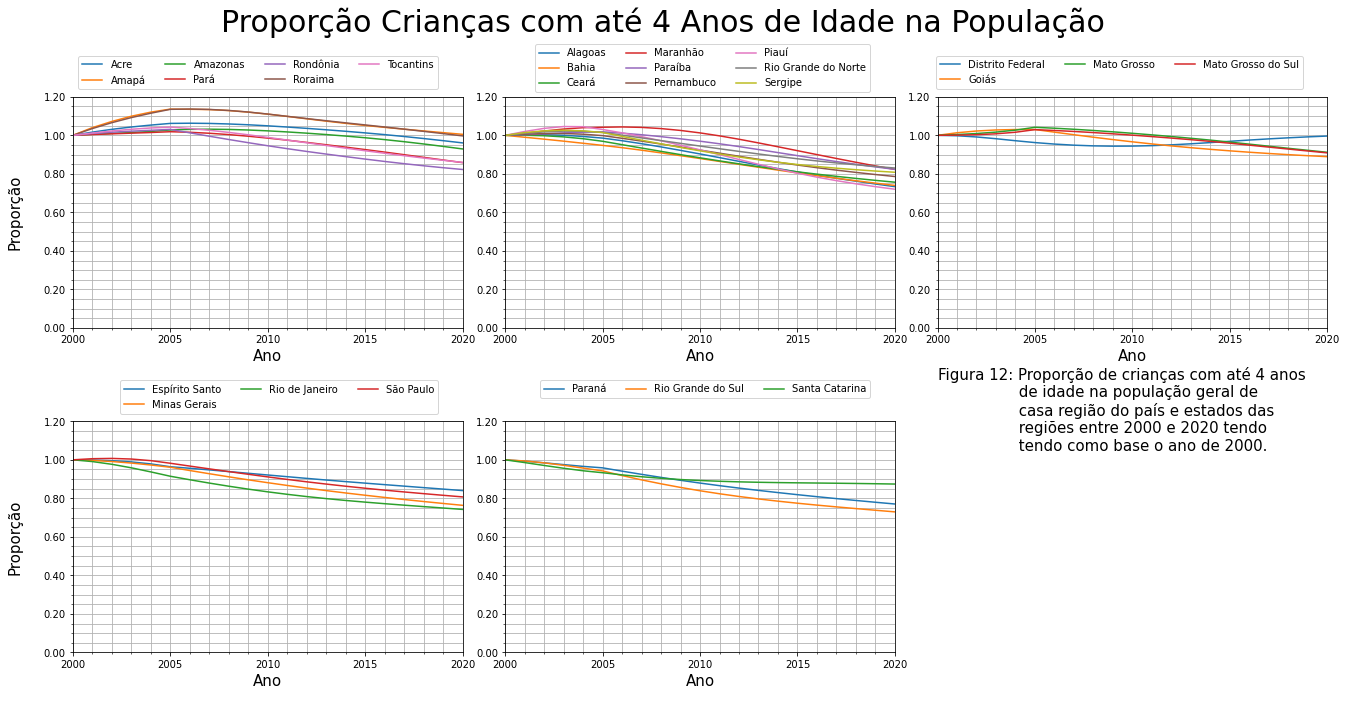

In [35]:
#### Gráfico de crescimento populacional proporcional por região


plt.figure(figsize=(20,10))
# Subgrágico de região - Norte
plt.subplot(2,3,1)
ax1 = sns.lineplot(data=proj_prop_pop_0a4_melt_prop.query('regiao=="Norte"'), 
                   x='ano',
                   y='value',
                   hue='uf')
ax1.legend(ncol=4,
           bbox_to_anchor=(.95, 1.2))
ax1.set_xlabel('''Ano
''', fontsize=15)
ax1.set_ylabel('''Proporção
''', fontsize=15)
ax1.set_xticks(np.arange(2000,2021,1), minor=True)
ax1.set_xticks(np.arange(2000,2021,5))
ax1.set_yticks(np.arange(0,2.1, .05), minor=True)
ax1.set_yticks(np.arange(0,2.1, .2))
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

ax1.set_xlim(2000,2020)
ax1.set_ylim(0,1.2)

ax1.grid(which='both')

plt.tight_layout(pad=6, h_pad=4, w_pad=3)

# Subgrágico de região - Nordeste
plt.subplot(2,3,2)
ax2 = sns.lineplot(data=proj_prop_pop_0a4_melt_prop.query('regiao=="Nordeste"'), 
                   x='ano',
                   y='value',
                   hue='uf')
ax2.legend(ncol=3,
           bbox_to_anchor=(.95,1.25))
ax2.set_xlabel('''Ano
''', fontsize=15)
ax2.set_ylabel('')

ax2.set_xticks(np.arange(2000,2021,1), minor=True)
ax2.set_xticks(np.arange(2000,2021,5))
ax2.set_yticks(np.arange(0,2.1, .05), minor=True)
ax2.set_yticks(np.arange(0,2.1, .2))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

ax2.set_xlim(2000,2020)
ax2.set_ylim(0,1.2)

ax2.grid(which='both')

# Subgrágico de região - Centro-Oeste
plt.subplot(2,3,3)
ax3 = sns.lineplot(data=proj_prop_pop_0a4_melt_prop.query('regiao=="Centro-Oeste"'), 
                   x='ano',
                   y='value',
                   hue='uf')
ax3.legend(ncol=3,
           bbox_to_anchor=(.95,1.2))
ax3.set_xlabel('''Ano
''', fontsize=15)
ax3.set_ylabel('')

ax3.set_xticks(np.arange(2000,2021,1), minor=True)
ax3.set_xticks(np.arange(2000,2021,5))
ax3.set_yticks(np.arange(0,2.1, .05), minor=True)
ax3.set_yticks(np.arange(0,2.1, .2))
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

ax3.set_xlim(2000,2020)
ax3.set_ylim(0,1.2)

ax3.grid(which='both')

# Subgrágico de região - Sudeste
plt.subplot(2,3,4)
ax4 = sns.lineplot(data=proj_prop_pop_0a4_melt_prop.query('regiao=="Sudeste"'), 
                   x='ano',
                   y='value',
                   hue='uf')
ax4.legend(ncol=3,
           bbox_to_anchor=(.95,1.2))
ax4.set_xlabel('''Ano
''', fontsize=15)
ax4.set_ylabel('''Proporção
''', fontsize=15)
ax4.set_xticks(np.arange(2000,2021,1), minor=True)
ax4.set_xticks(np.arange(2000,2021,5))
ax4.set_yticks(np.arange(0,4.1, .05), minor=True)
ax4.set_yticks(np.arange(0,4.1, .2))
ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

ax4.set_xlim(2000,2020)
ax4.set_ylim(0,1.2)

ax4.grid(which='both')

# Subgrágico de região - Sul
plt.subplot(2,3,5)
ax5 = sns.lineplot(data=proj_prop_pop_0a4_melt_prop.query('regiao=="Sul"'), 
                   x='ano',
                   y='value',
                   hue='uf')
ax5.legend(ncol=3,
           bbox_to_anchor=(.95,1.2))
ax5.set_xlabel('''Ano
''', fontsize=15)
ax5.set_ylabel('')

ax5.set_xticks(np.arange(2000,2021,1), minor=True)
ax5.set_xticks(np.arange(2000,2021,5))
ax5.set_yticks(np.arange(0,2.1, .05), minor=True)
ax5.set_yticks(np.arange(0,2.1, .2))
ax5.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

ax5.set_xlim(2000,2020)
ax5.set_ylim(0,1.2)

ax5.grid(which='both')

ax6 = plt.subplot(2,3,6)
ax6.text(0.,.8,'''
Figura 12: Proporção de crianças com até 4 anos 
                 de idade na população geral de
                 casa região do país e estados das
                 regiões entre 2000 e 2020 tendo    
                 tendo como base o ano de 2000.          
''', fontsize=15)
ax6.axis('off')
#plt.text(1,1,'Figura 04', fontsize=15)

plt.suptitle('''Proporção Crianças com até 4 Anos de Idade na População \n\n
''', fontsize=30)


plt.show()

Uma observação geral da população de crianças até 4 anos permite afirmar que houve uma redução na maioria dos estados e regiões (a única exceção é o Distrito Federal). Dessa forma é esperado que também haja uma redução da quantidade de doses aplicadas.

Contudo, a redução de doses aplicadas, como pode ser visto na Figura 08 é maior que a redução da população de crianças de até 4 ano, como visto na Figura 12. Isso indica que houve realmente uma redução de busca por doses para essa faixa de idade.

Cabe agora entender o motivo que levou à redução da adesão da população à campanha de vacinação.

## Gastos com Publicidade

Uma das hipóteses que serão testadas é que a redução de gastos com publicidade na saúde foi o causador da menor aderência da população às campanhas de vacinação.

Para possibilitar esse teste é necessário fazer a avaliação da qualidade dos dados da mesma forma que tem sido feito em nos demais bancos de dados levantados.

In [36]:
#### Explorar possíveis gastos de Saúde nos dados
anos = np.arange(2014,2020)
ano=anos[0]
link_publicid_gov = f'https://raw.githubusercontent.com/alcarnielo/Bootcamp_Alura/main/Modulo_02/publicidade_publica_{ano}.csv'
publicid_gov = pd.read_csv(link_publicid_gov, sep=';', decimal=',', thousands='.', 
                           date_parser='%m/%Y')
publicid_gov.head()

,Mês Ano,Programa Orçamentário,Ação Orçamentária,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos a Pagar Pagos,Unnamed: 7
0,02/2014,0351 - AGRICULTURA FAMILIAR - PRONAF,4641 - PUBLICIDADE DE UTILIDADE PUBLICA,"0,00","0,00","0,00",149564.18,NaN
1,09/2014,0351 - AGRICULTURA FAMILIAR - PRONAF,4641 - PUBLICIDADE DE UTILIDADE PUBLICA,"0,00","0,00","0,00",1469.65,NaN
2,05/2014,0351 - AGRICULTURA FAMILIAR - PRONAF,4641 - PUBLICIDADE DE UTILIDADE PUBLICA,"0,00","0,00","0,00",33917.34,NaN
3,09/2014,0135 - ASSENTAMENTOS PARA TRABALHADORES RURAIS,4641 - PUBLICIDADE DE UTILIDADE PUBLICA,"0,00","0,00","0,00",924.54,NaN
4,05/2014,1220 - ASSISTÊNCIA AMBULATORIAL E HOSPITALAR E...,4641 - PUBLICIDADE DE UTILIDADE PUBLICA,"0,00","0,00","0,00",675.45,NaN


Em uma inspeção rápida dos dados é possível perceber que há várias contas relacionadas a saúde. Essas contas tem nome e numeração padronizada, contudo a palavra **saúde** não encontra-se escrita de forma padrão (SAUDE e SAÚDE).

In [37]:
# Verificar contas de SAUDE
publicid_gov.loc[publicid_gov['Programa Orçamentário'].str.contains('SAÚDE'),
                 'Programa Orçamentário'].unique()

array(['1214 - ATENÇÃO BÁSICA EM SAÚDE',
       '1446 - IMPLEMENTAÇÃO DA POLÍTICA DE PROMOÇÃO DA SAÚDE'],
      dtype=object)

In [38]:
# Verificar contas de SAÚDE
publicid_gov.loc[publicid_gov['Programa Orçamentário'].str.contains('SAUDE'),
                 'Programa Orçamentário'].unique()

array(['2015 - FORTALECIMENTO DO SISTEMA UNICO DE SAUDE (SUS)',
       '2115 - PROGRAMA DE GESTAO E MANUTENCAO DO MINISTERIO DA SAUDE'],
      dtype=object)

Feita essa verificação de contas de gastos de saúde, é necessário inspecionar também as contas com gastos dos outros anos.

Além disso é necessário fazer algumas correções dos dados após a importação

In [39]:
#### Carregar dados de gastos com publicidade do Governo Federal 
publicid_gov = pd.DataFrame()
for ano in anos:
    link_publicid_gov = f'https://raw.githubusercontent.com/alcarnielo/Bootcamp_Alura/main/Modulo_02/publicidade_publica_{ano}.csv'
    gastos_publicid = pd.read_csv(
                                  link_publicid_gov, encoding='utf-8', sep=';',
                                  # decimal=',', thousands='.'
                                  )
    publicid_gov = publicid_gov.append(gastos_publicid)

In [40]:
publicid_gov.head()

,Mês Ano,Programa Orçamentário,Ação Orçamentária,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos a Pagar Pagos,Unnamed: 7
0,02/2014,0351 - AGRICULTURA FAMILIAR - PRONAF,4641 - PUBLICIDADE DE UTILIDADE PUBLICA,"0,00","0,00","0,00","149.564,18",NaN
1,09/2014,0351 - AGRICULTURA FAMILIAR - PRONAF,4641 - PUBLICIDADE DE UTILIDADE PUBLICA,"0,00","0,00","0,00","1.469,65",NaN
2,05/2014,0351 - AGRICULTURA FAMILIAR - PRONAF,4641 - PUBLICIDADE DE UTILIDADE PUBLICA,"0,00","0,00","0,00","33.917,34",NaN
3,09/2014,0135 - ASSENTAMENTOS PARA TRABALHADORES RURAIS,4641 - PUBLICIDADE DE UTILIDADE PUBLICA,"0,00","0,00","0,00","924,54",NaN
4,05/2014,1220 - ASSISTÊNCIA AMBULATORIAL E HOSPITALAR E...,4641 - PUBLICIDADE DE UTILIDADE PUBLICA,"0,00","0,00","0,00","675,45",NaN


In [41]:
publicid_gov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 0 to 151
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Mês Ano                     1431 non-null   object 
 1   Programa Orçamentário       1431 non-null   object 
 2   Ação Orçamentária           1431 non-null   object 
 3   Valor Empenhado             1431 non-null   object 
 4   Valor Liquidado             1431 non-null   object 
 5   Valor Pago                  1431 non-null   object 
 6   Valor Restos a Pagar Pagos  1431 non-null   object 
 7   Unnamed: 7                  0 non-null      float64
dtypes: float64(1), object(7)
memory usage: 100.6+ KB


In [42]:
#### Corrigir valores das colunas
# mudar datas para datetime
publicid_gov['Mês Ano'] = pd.to_datetime(publicid_gov['Mês Ano'], format='%m/%Y')

# Corrigir valor empenhado para float
publicid_gov['Valor Empenhado'] = publicid_gov['Valor Empenhado'].str.replace('.','').str.replace(',','.').str.replace(' ','').astype('float')

# Corrigir valor Liquidado para float
publicid_gov['Valor Liquidado'] = publicid_gov['Valor Liquidado'].str.replace('.','').str.replace(',','.').str.replace(' ','').astype('float')

# Corrigir valor Liquidado para float
publicid_gov['Valor Pago'] = publicid_gov['Valor Pago'].str.replace('.','').str.replace(',','.').str.replace(' ','').astype('float')

# Corrigir valor Liquidado para float
publicid_gov['Valor Restos a Pagar Pagos'] = publicid_gov['Valor Restos a Pagar Pagos'].str.replace('.','').str.replace(',','.').str.replace(' ','').astype('float')
publicid_gov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 0 to 151
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Mês Ano                     1431 non-null   datetime64[ns]
 1   Programa Orçamentário       1431 non-null   object        
 2   Ação Orçamentária           1431 non-null   object        
 3   Valor Empenhado             1431 non-null   float64       
 4   Valor Liquidado             1431 non-null   float64       
 5   Valor Pago                  1431 non-null   float64       
 6   Valor Restos a Pagar Pagos  1431 non-null   float64       
 7   Unnamed: 7                  0 non-null      float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 100.6+ KB


In [43]:
#### Buscar "contas" de gastos com saúde
# Checar contas de empenho da "SAUDE"
publicid_gov.loc[publicid_gov['Programa Orçamentário'].str.contains('SAÚDE'),
                 'Programa Orçamentário'].unique()

array(['1214 - ATENÇÃO BÁSICA EM SAÚDE',
       '1446 - IMPLEMENTAÇÃO DA POLÍTICA DE PROMOÇÃO DA SAÚDE'],
      dtype=object)

In [44]:
# Checar contas de empenho da "SAÚDE"
publicid_gov.loc[publicid_gov['Programa Orçamentário'].str.contains('SAUDE'),
                 'Programa Orçamentário'].unique()

array(['2015 - FORTALECIMENTO DO SISTEMA UNICO DE SAUDE (SUS)',
       '2115 - PROGRAMA DE GESTAO E MANUTENCAO DO MINISTERIO DA SAUDE'],
      dtype=object)

Dado que existem apenas 4 contas de gastos publicitários com saúde, é necessário filtrar estes para continuar a exploração dos dados.

In [45]:
gastos_saude = publicid_gov.loc[(publicid_gov['Programa Orçamentário'] == '1214 - ATENÇÃO BÁSICA EM SAÚDE') |
                                (publicid_gov['Programa Orçamentário'] == '1446 - IMPLEMENTAÇÃO DA POLÍTICA DE PROMOÇÃO DA SAÚDE') | 
                                (publicid_gov['Programa Orçamentário'] == '2015 - FORTALECIMENTO DO SISTEMA UNICO DE SAUDE (SUS)') | 
                                (publicid_gov['Programa Orçamentário'] == '2115 - PROGRAMA DE GESTAO E MANUTENCAO DO MINISTERIO DA SAUDE')
                                ].groupby('Mês Ano')[
                                                     ['Valor Empenhado','Valor Liquidado',
                                                      'Valor Pago','Valor Restos a Pagar Pagos']
                                                     ].sum()
gastos_saude.head()

,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos a Pagar Pagos
Mês Ano,,,,
2014-01-01,50196958.71,0.00,0.00,2545041.84
2014-02-01,19803041.29,0.00,0.00,19856439.74
2014-03-01,3900000.00,7678433.05,7678433.05,7244932.24
2014-04-01,25000.00,10515320.95,10515320.95,1561571.39
2014-05-01,80280779.42,40057420.73,39952260.04,2197318.70


In [46]:
#### Cáculo de pagamentos efetuados
pagamentos_saude_efetuados = gastos_saude.groupby(gastos_saude.index.year)[['Valor Pago', 'Valor Restos a Pagar Pagos']].sum()
pagamentos_saude_efetuados['Total'] = pagamentos_saude_efetuados[['Valor Pago', 'Valor Restos a Pagar Pagos']].sum(axis=1)
pagamentos_saude_efetuados

,Valor Pago,Valor Restos a Pagar Pagos,Total
Mês Ano,,,
2014,1.524435e+08,40737291.04,1.931808e+08
2015,9.095066e+07,25608004.83,1.165587e+08
2016,1.307810e+08,51203248.99,1.819842e+08
2017,2.000249e+08,47163885.60,2.471887e+08
2018,2.140905e+08,49466287.22,2.635568e+08
2019,1.058329e+08,49593908.13,1.554268e+08


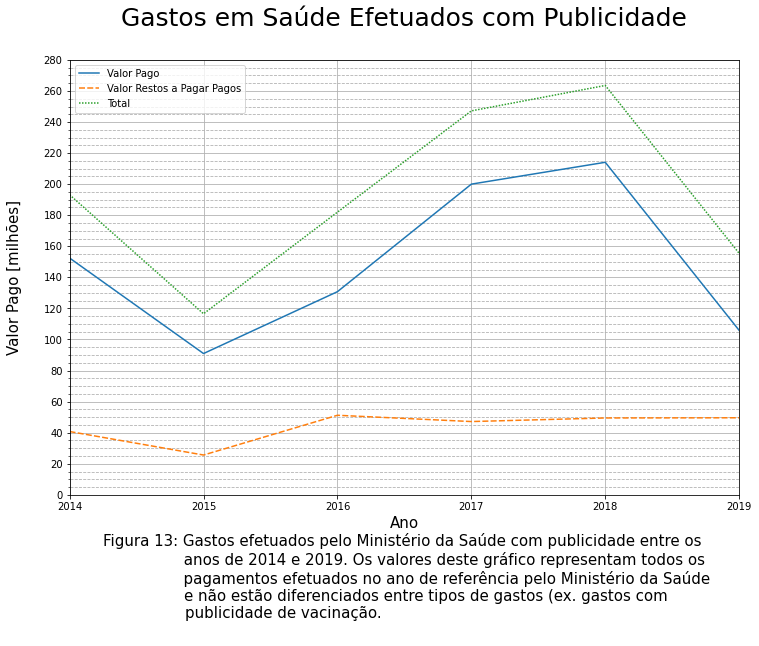

In [47]:
#### Gerar gráfico de gastos efetuados 
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=pagamentos_saude_efetuados/1e6)
ax.set_title('''Gastos em Saúde Efetuados com Publicidade
''', fontsize=25)
ax.set_xlabel('''Ano
Figura 13: Gastos efetuados pelo Ministério da Saúde com publicidade entre os 
                 anos de 2014 e 2019. Os valores deste gráfico representam todos os
                  pagamentos efetuados no ano de referência pelo Ministério da Saúde
                e não estão diferenciados entre tipos de gastos (ex. gastos com       
                publicidade de vacinação.                                                                   
''',fontsize=15)
ax.set_ylabel('''Valor Pago [milhões]
''',fontsize=15)

ax.set_xticks(np.arange(2000,2020))
ax.set_yticks(np.arange(0,280,5), minor=True)
ax.set_yticks(np.arange(0,281,20))
ax.set_xlim(2014,2019)
ax.set_ylim(0,280)
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='dashed')

Com esses dados, não é possível afirmar com certeza se houve redução significativa dos gastos em saúde.

Uma possível correção para verificar se houve redução nos gastos em saúde efetuados é através da correção dos valores dos vastos pela inflação ([IPCA](https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=series-historicas)) no período. 

In [48]:
#### Correção de inflação no período
# fonte: https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=series-historicas
# Carregar IPCA
fonte_IPCA = '''ano	IPCA
dezembro 1995	22,41
dezembro 1996	9,56
dezembro 1997	5,22
dezembro 1998	1,65
dezembro 1999	8,94
dezembro 2000	5,97
dezembro 2001	7,67
dezembro 2002	12,53
dezembro 2003	9,30
dezembro 2004	7,60
dezembro 2005	5,69
dezembro 2006	3,14
dezembro 2007	4,46
dezembro 2008	5,90
dezembro 2009	4,31
dezembro 2010	5,91
dezembro 2011	6,50
dezembro 2012	5,84
dezembro 2013	5,91
dezembro 2014	6,41
dezembro 2015	10,67
dezembro 2016	6,29
dezembro 2017	2,95
dezembro 2018	3,75
dezembro 2019	4,31
'''.replace('dezembro ', '')

IPCA_io = StringIO(fonte_IPCA)
IPCA = pd.read_csv(IPCA_io, sep='\t', decimal=',',header=0,
                   index_col=0)
IPCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1995 to 2019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IPCA    25 non-null     float64
dtypes: float64(1)
memory usage: 400.0 bytes


In [49]:
# Colocar IPCA na base de 0 a 1 
IPCA_mod = IPCA.copy()
IPCA_mod['IPCA'] = IPCA_mod['IPCA']/100
IPCA_mod.head()

,IPCA
ano,
1995,0.2241
1996,0.0956
1997,0.0522
1998,0.0165
1999,0.0894


In [50]:
# Criar coluna de "corretor de inflação"
IPCA_mod['corretor'] = 1 - IPCA_mod['IPCA']
IPCA_mod.head()

,IPCA,corretor
ano,,
1995,0.2241,0.7759
1996,0.0956,0.9044
1997,0.0522,0.9478
1998,0.0165,0.9835
1999,0.0894,0.9106


In [51]:
def multip_cumulativa(df, ind_i, ind_f, col):
    """
    Esta função calcula a multiplicação cumulativa entre os valores que estão 
    localizados em um dataframe "df" entre os índices index_i (inclusivamenet e 
    index_f (exclusivamente).

    Assim:
        novo_valor = df.loc[ind_i]*df.loc[ind_i+1]*...*df.loc[ind_i(n-1)]


    INPUT:
        df      - pandas DataFrame
                - Dataframe que será utilizado para fazer os cálculos
        
        ind_i   - str, int
                - Valor que está no índice inicial
        
        ind_f   - str, int
                - Valor que está no índice final
        
        col     - str, int
                - Valor que está na coluna que se deseja avaliar
    
    OUTPUT:
        mult    - float
                - Valor resultado da multiplicação entre os valores entre ind_i 
                e ind_f
    """
    from functools import reduce
    mult = reduce(lambda x, y: x*y, 
                  df.loc[ind_i:ind_f:,col].tolist())/ df.loc[ind_f,col]
    
    return mult
multip_cumulativa(df = IPCA_mod,
                  ind_i=2014,
                  ind_f=2019,
                  col='corretor')

0.7318279584101626

In [52]:
# Criar fator de correção cumulativo
IPCA_2014_2019 = IPCA_mod.loc[2014:2019]
IPCA_2014_2019['cumulativo'] = [0.9359*0.8933*0.9371*0.9705*0.9625,
                                       0.8933*0.9371*0.9705*0.9625,
                                              0.9371*0.9705*0.9625,
                                                     0.9705*0.9625,
                                                            0.9625,
                                                                  1]
IPCA_2014_2019

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,IPCA,corretor,cumulativo
ano,,,
2014,0.0641,0.9359,0.731828
2015,0.1067,0.8933,0.781951
2016,0.0629,0.9371,0.875351
2017,0.0295,0.9705,0.934106
2018,0.0375,0.9625,0.962500
2019,0.0431,0.9569,1.000000


In [53]:
# Realizar correção pela inflação
pagamentos_saude_corrigido_ipca = pagamentos_saude_efetuados.T/IPCA_2014_2019['cumulativo']

In [54]:
pagamentos = pd.DataFrame()
pagamentos['valor_pago'] = pagamentos_saude_efetuados['Total']
pagamentos['valor_corrigido_ipca'] = pagamentos_saude_corrigido_ipca.T['Total']

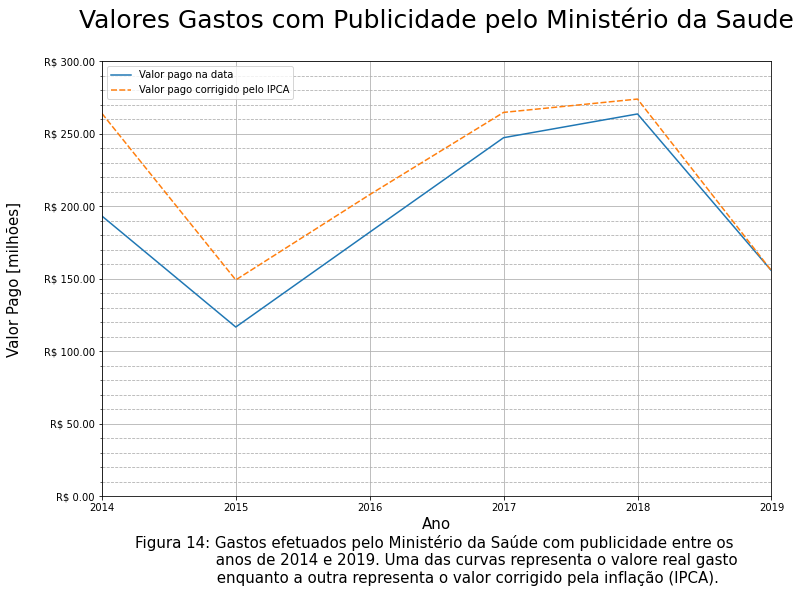

In [55]:
#### Gerar gráfico de gastos corrigidos pela inflação
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=pagamentos/1e6, legend=0)
ax.set_title('''Valores Gastos com Publicidade pelo Ministério da Saude
''', fontsize=25)
ax.set_xlabel('''Ano
Figura 14: Gastos efetuados pelo Ministério da Saúde com publicidade entre os 
                 anos de 2014 e 2019. Uma das curvas representa o valore real gasto
                 enquanto a outra representa o valor corrigido pela inflação (IPCA).    
''',fontsize=15)
ax.set_ylabel('''Valor Pago [milhões]
''',fontsize=15)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:.2f}'))
ax.set_xticks(np.arange(2000,2020))
ax.set_yticks(np.arange(0,300,10), minor=True)
ax.set_yticks(np.arange(0,301,50))
ax.set_xlim(2014,2019)
ax.set_ylim(0,300)
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='dashed')
ax.legend(['Valor pago na data',
           'Valor pago corrigido pelo IPCA'])

Mesmo após a correção da inflação não é possível concluir se a redução de gastos com publicidade pelo ministério da saúde foi o causador da menor adesão às campanhas de vacinação desde 2015.

Para possibilitar uma avaliação mais detalhada seria necessário obter a informação dos gastos realizados diretamente com campanha publicitária para vacinação da população, o que não foi possível até o momento.


# Conclusão

Não é possível afirmar que a menor aderência da população às campanhas vacinais está relacionada com redução de gastos de publicidade do Governo Federal e Ministério da Saúde.

Essa impossibilidade se deve a indisponibilidade de dados para períodos maiores. A base de dados de gastos com publicidade do SUS obtida para este estudo apresenta valores a partir de 2014. Como essa data está muito próxima da data em que ocorreu a queda de adesão (2015), não há como  capturar se houve uma redução de exposição de informação para a população, fazendo com que ela também perdesse o hábito de se vacinar e levasse os filhos para se imunizar.

Desta forma, propõe-se para trabalhos futuros que seja feita a coleta/requisição via portal da transparência de dados de gastos com publicidade de vacinação no Brasil de 2000 até 2020 e estes dados comparados com a evolução da vacinação na população.